In [1]:
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
set_default()

In [3]:
device = torch.device('cuda:0')

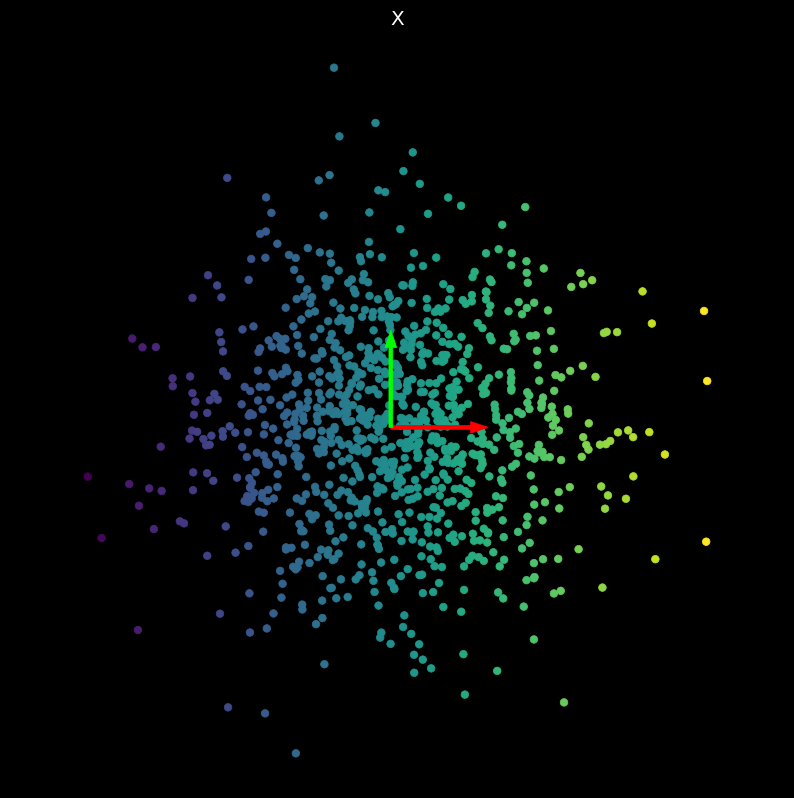

In [4]:
# generate some points in 2d space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

In [5]:
OI

tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 1.]], device='cuda:0')

# Visualizing linear transformations

Generate a random matrix $W$:
$$ W = U \begin{pmatrix} s_1 & 0 \\ 0 & s_2 \end{pmatrix} V^T$$

* compute $y = Wx$
* larger singular values stretch the points
* smaller singular values push them together
* U, V rotate/reflect

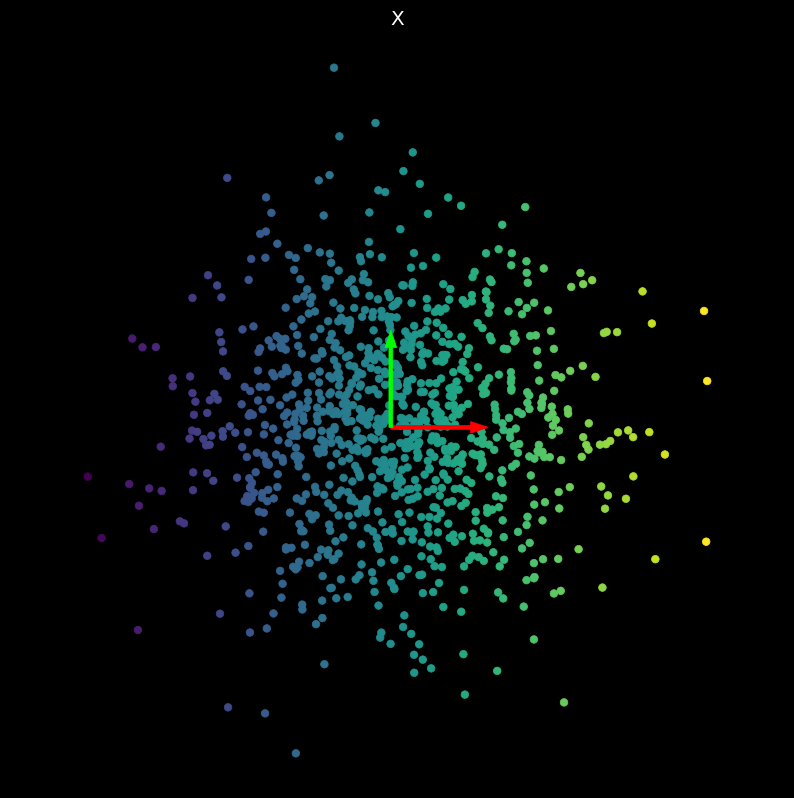

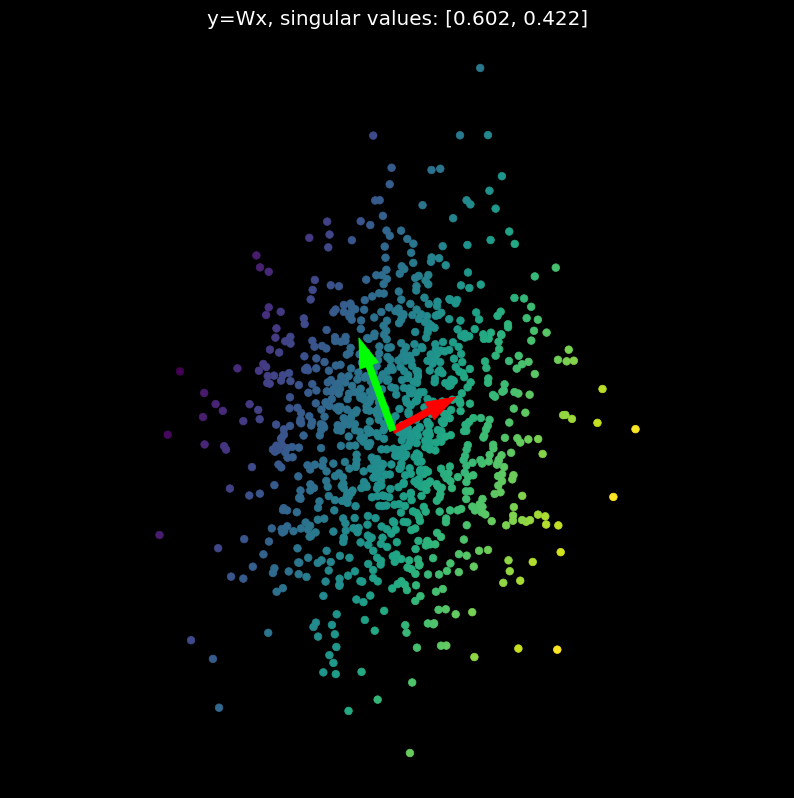

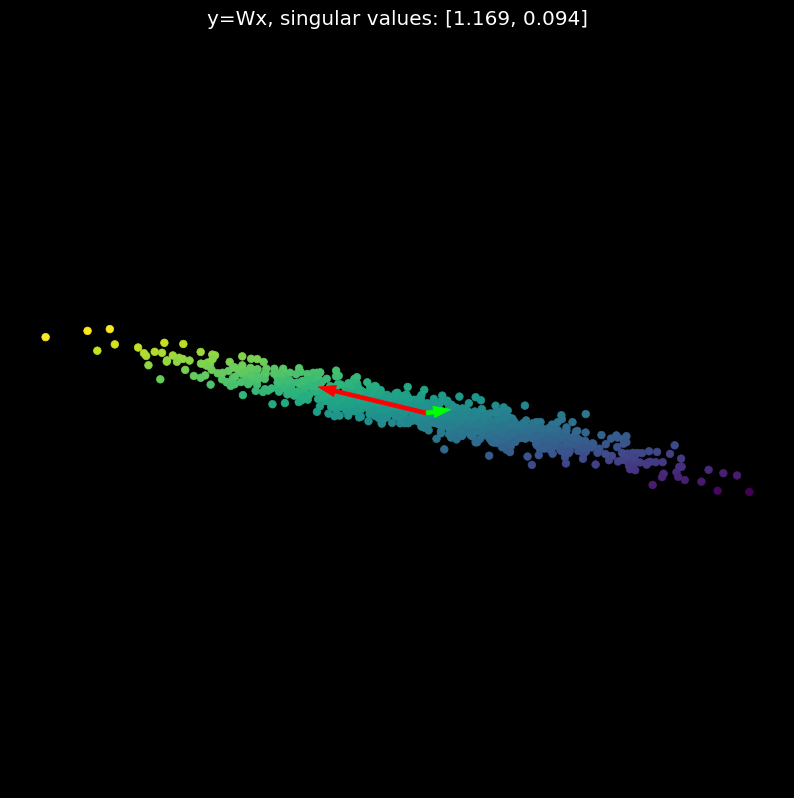

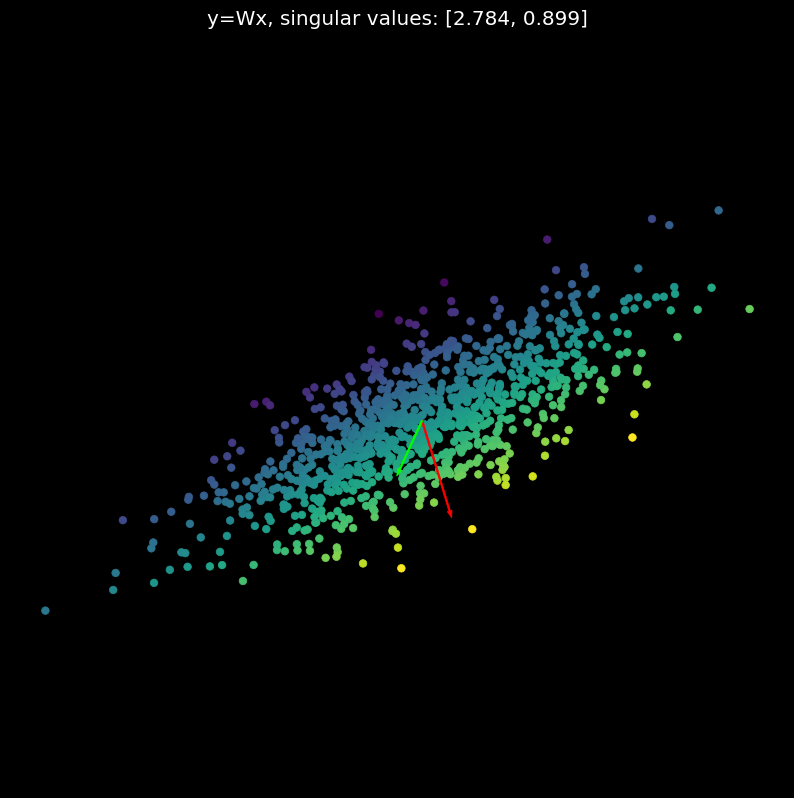

In [12]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(3):
    
    # create random matrix
    W = torch.randn(2, 2).to(device)
    
    # transform points
    Y = X @ W.t()
    
    # compute singular values
    U, S, V = torch.svd(W)
    
    # plot transformed points
    show_scatterplot(Y, colors, title='y=Wx, singular values: [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    
    # transform basis
    new_OI = OI @ W
    
    # plot old and new basis
#     plot_bases(OI)
    plot_bases(new_OI)

# Linear transformation with Pytorch

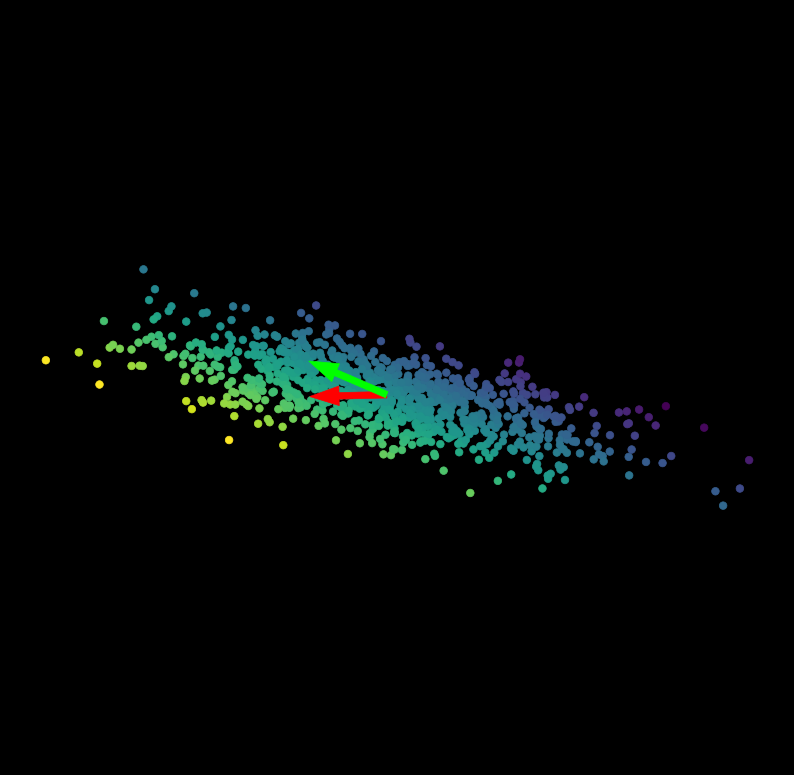

In [11]:
model = nn.Sequential(
    nn.Linear(2, 2, bias=False)
)

model.to(device)

with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

# Non-linear transform: map points to a square

* linear transforms can rotate, reflect, stretch, and compress, but cannot curve
* we need non-linearities for this
* can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function

$$ f(X) = \tanh \left ( \begin{bmatrix} s & 0 \\ 0 & s \end{bmatrix} X \right ) $$

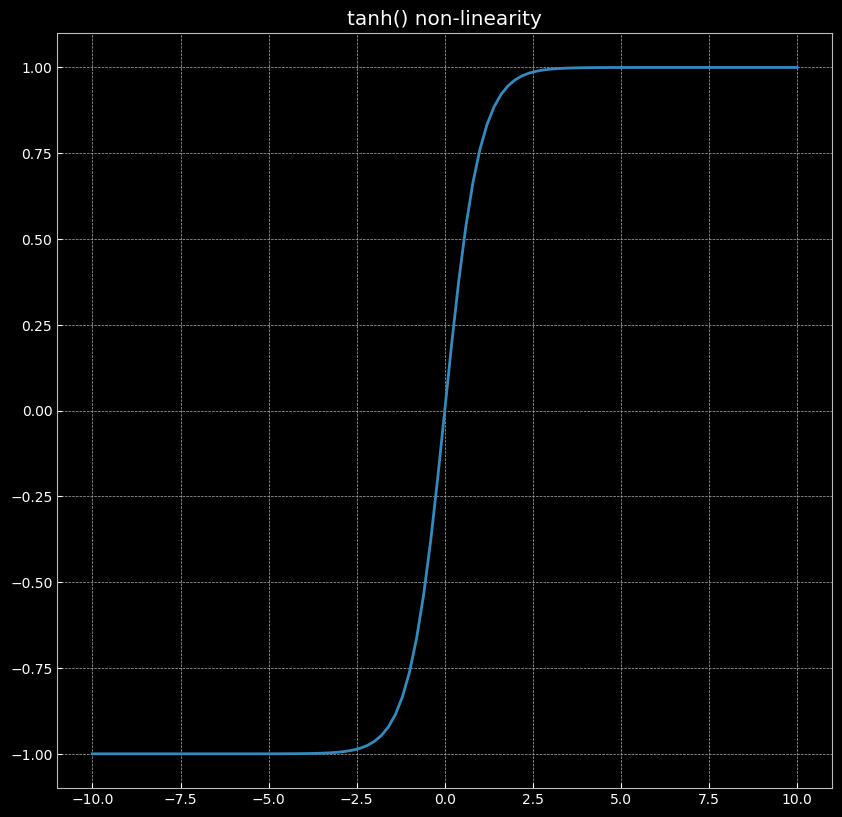

In [14]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)

plot(z.numpy(), s.numpy())
title('tanh() non-linearity');

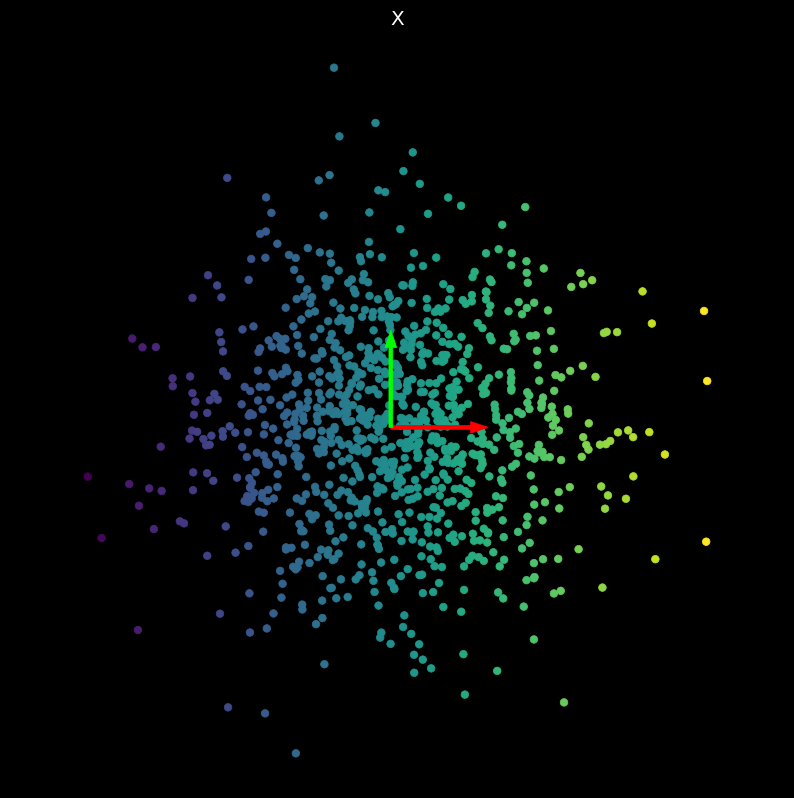

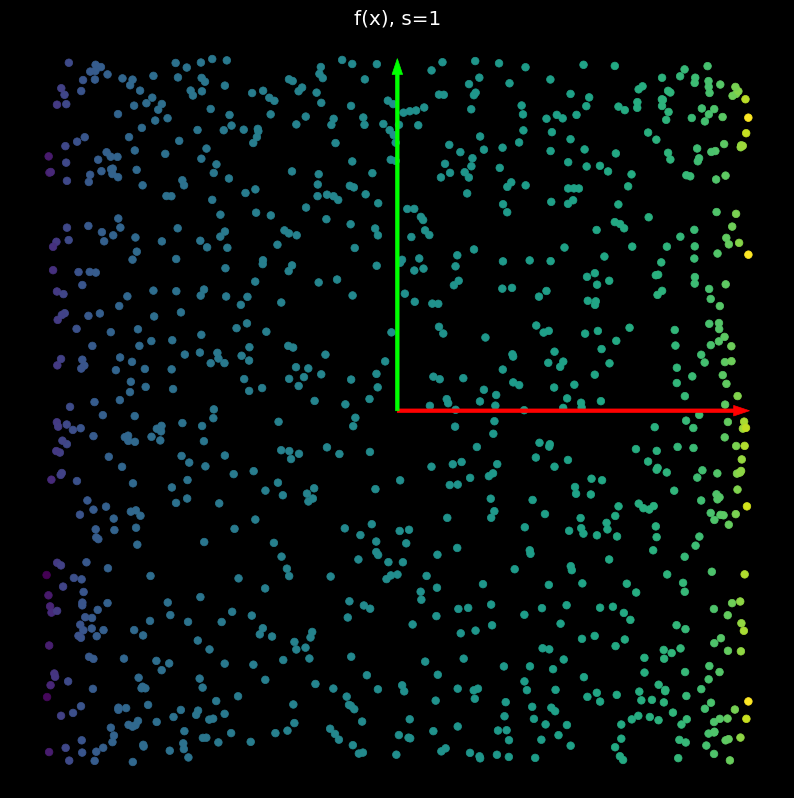

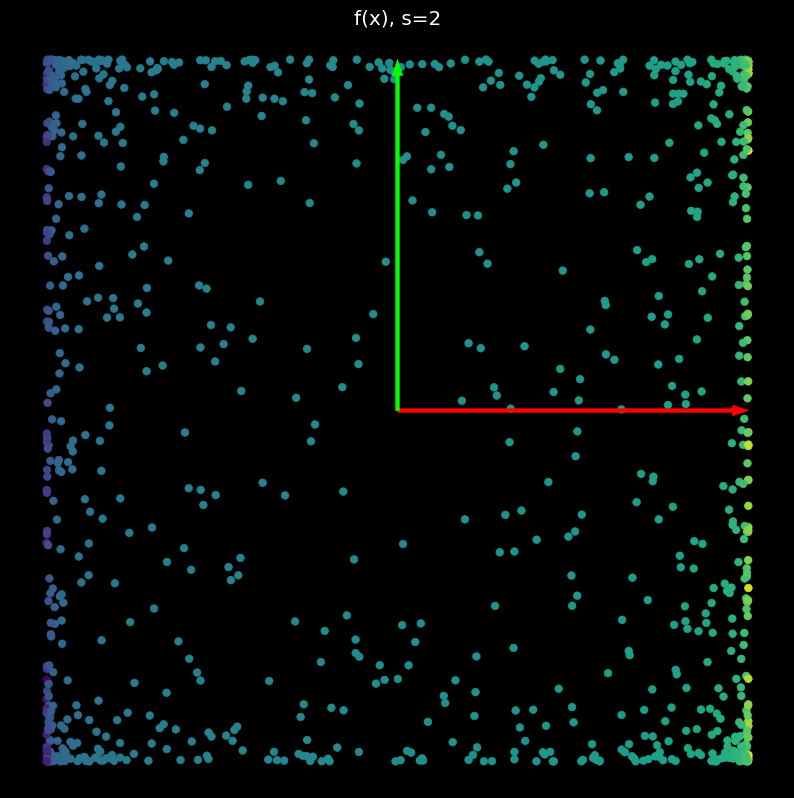

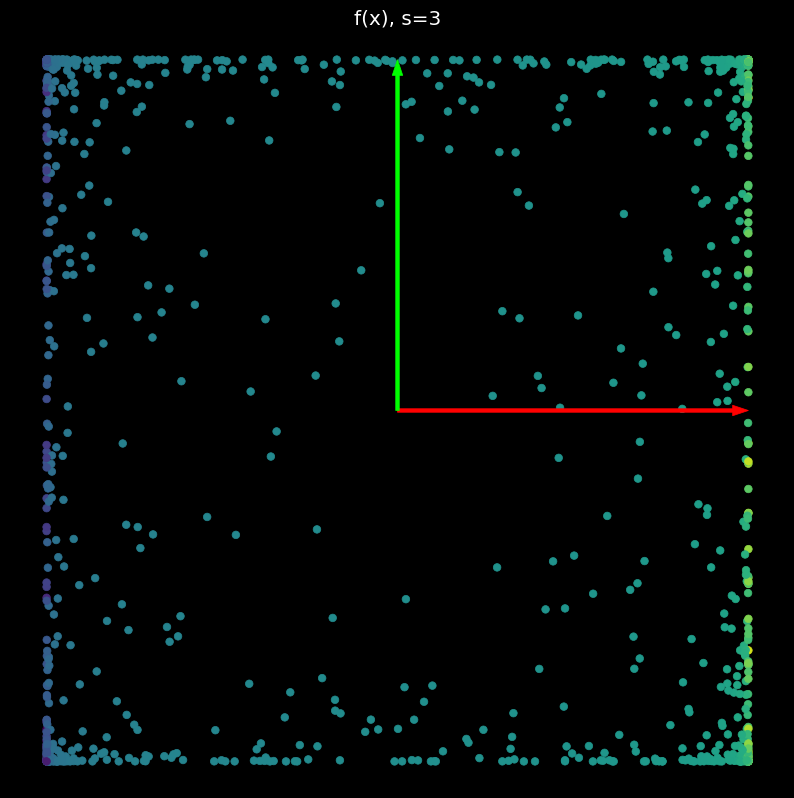

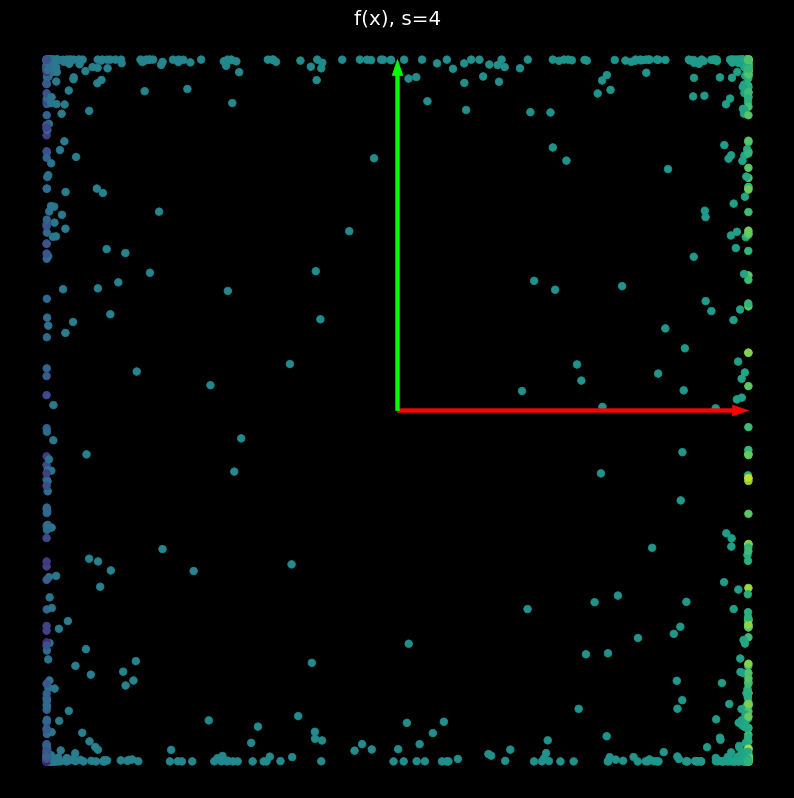

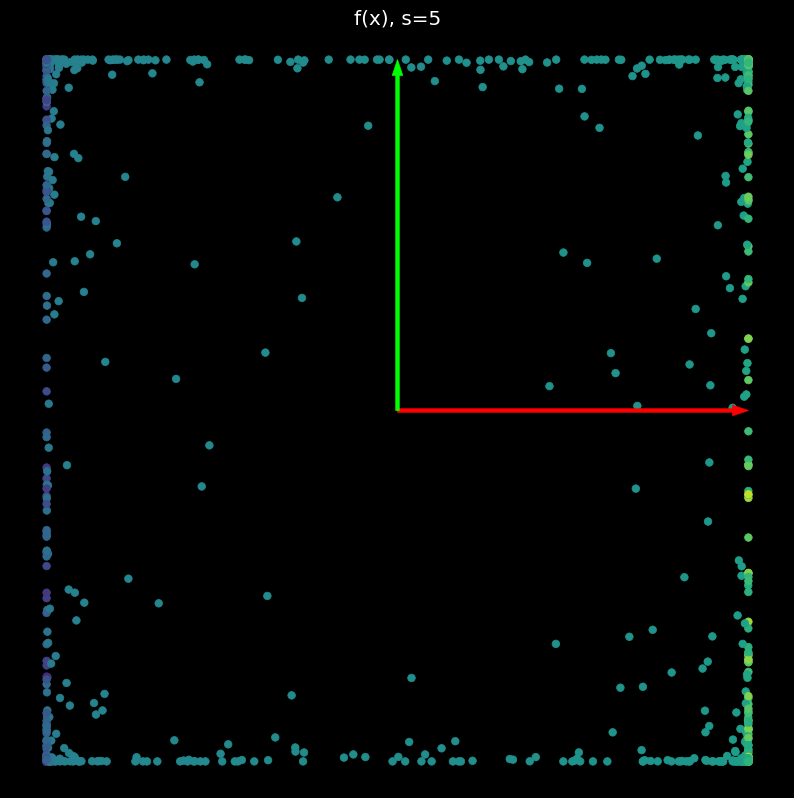

In [16]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
    nn.Linear(2, 2, bias=False),
    nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

# Visualize functions represented by random neural networks

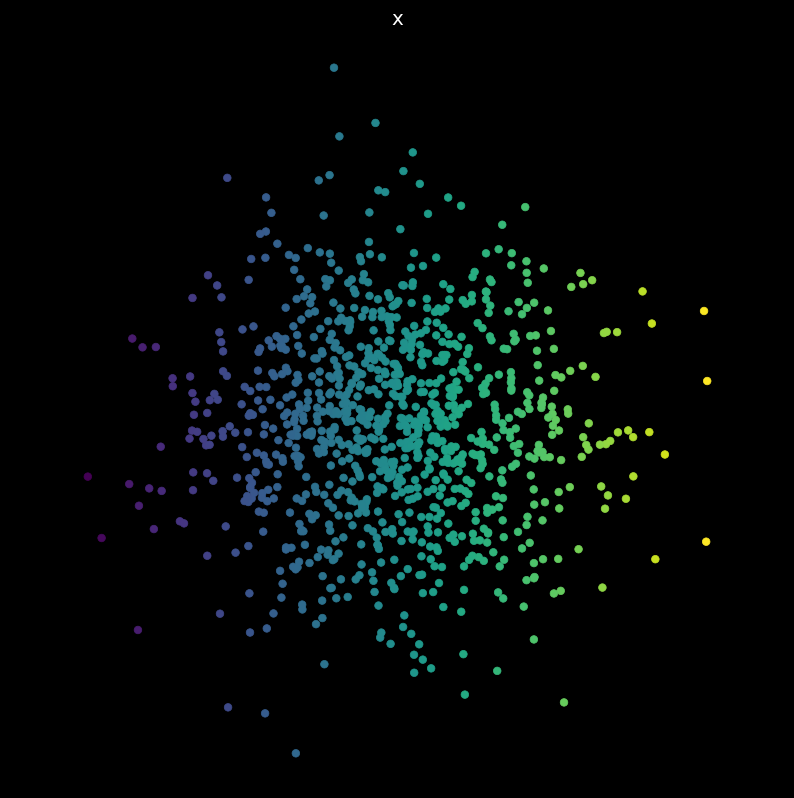

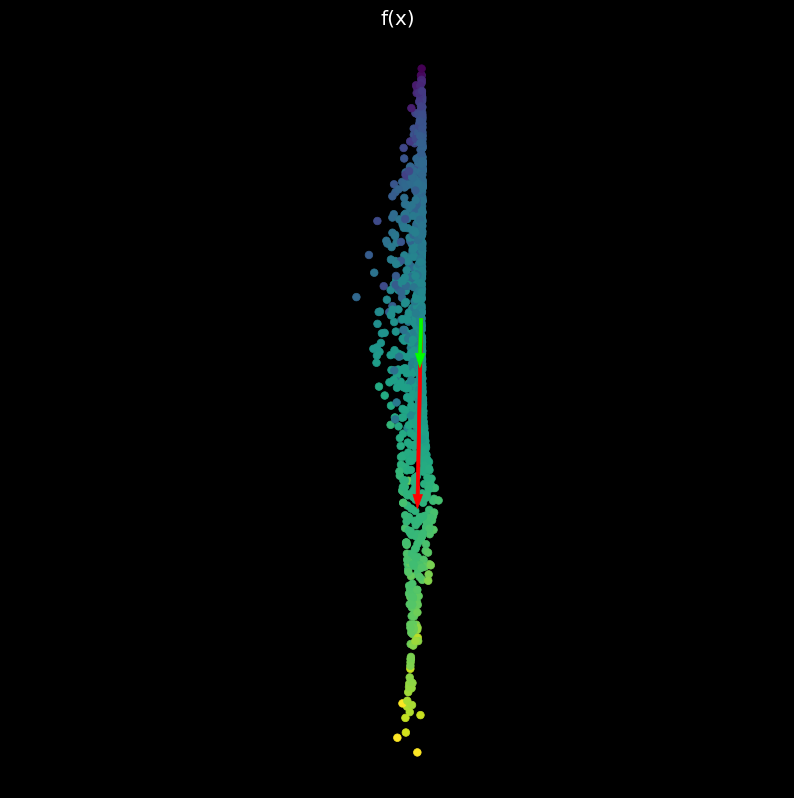

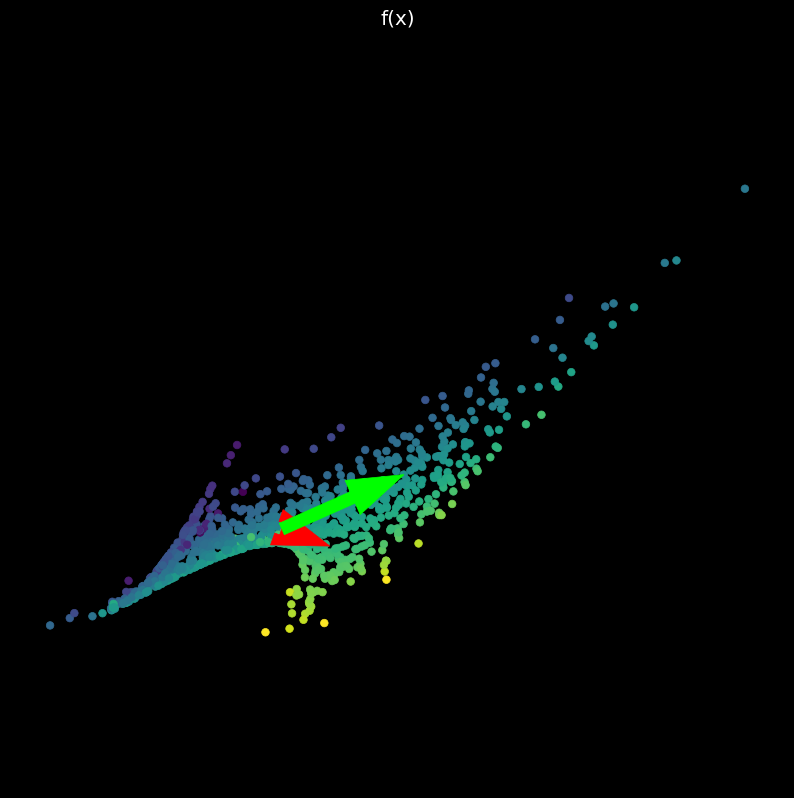

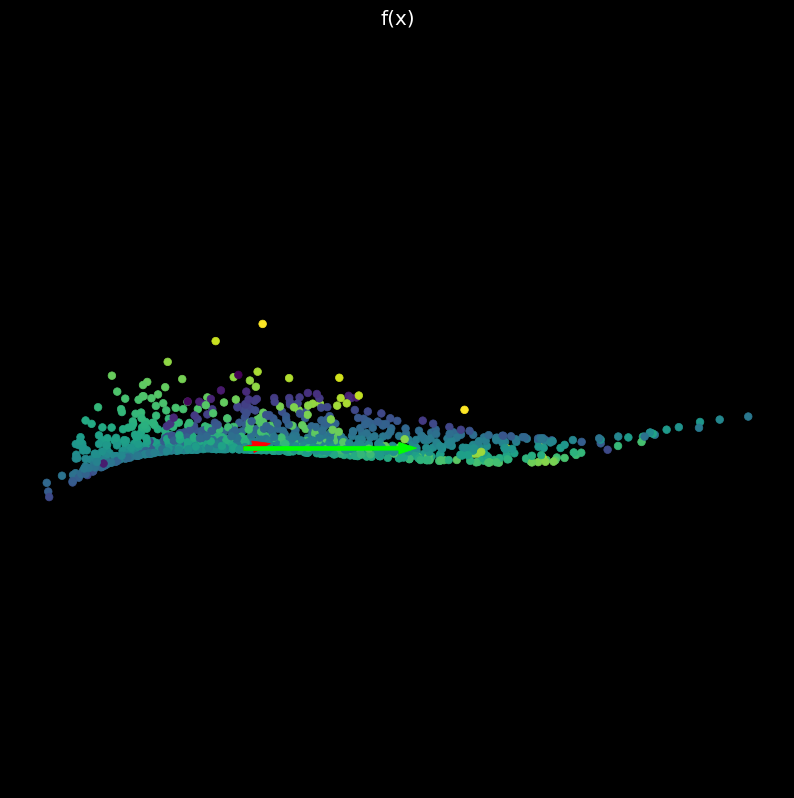

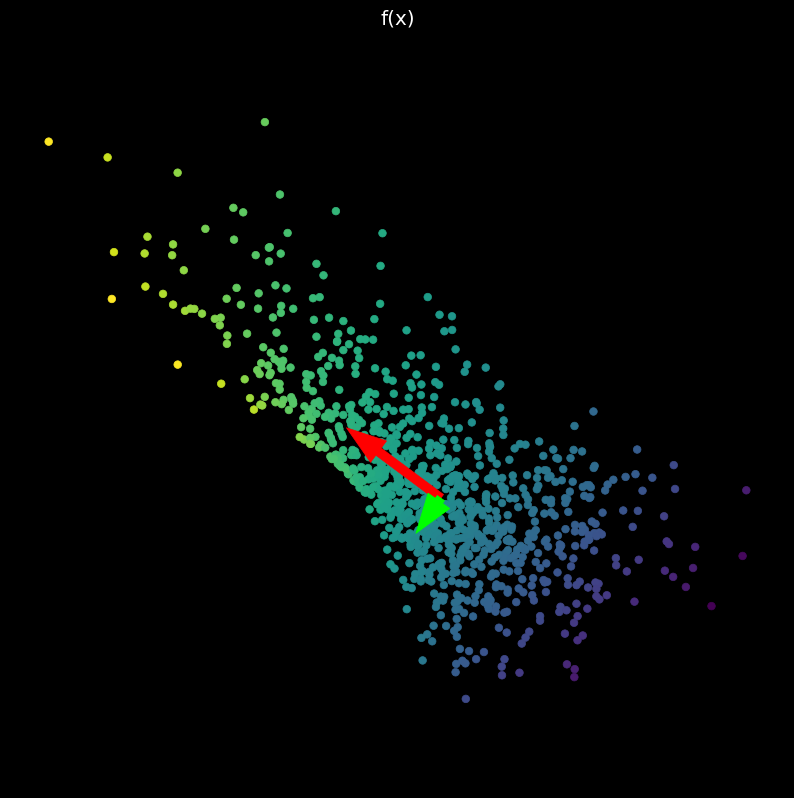

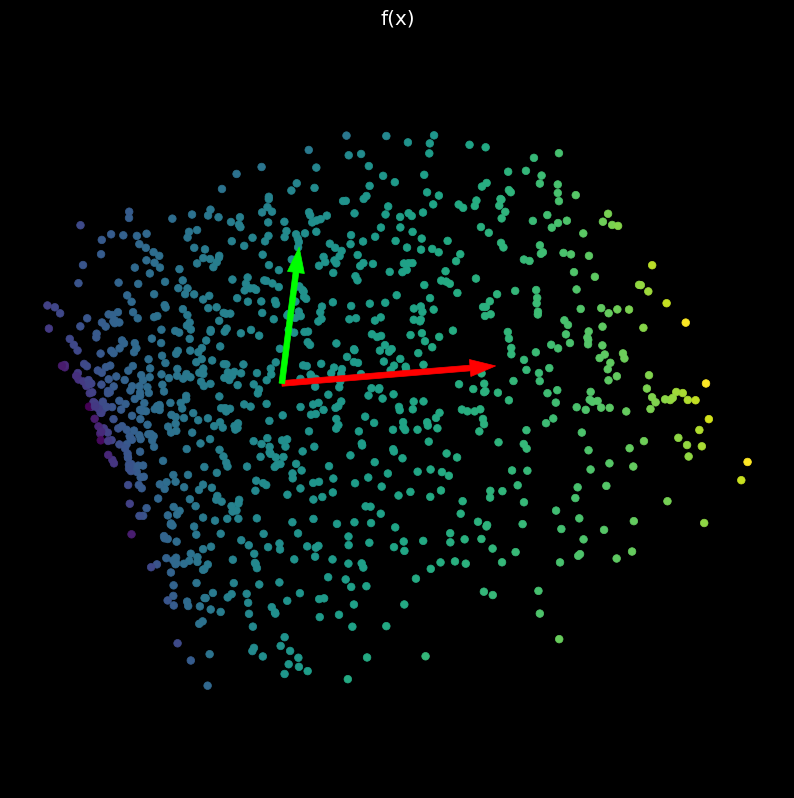

In [20]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.Tanh() # or nn.ReLU()

for i in range(5):
    # create 1-layer NNs with random weights
    model = nn.Sequential(
        nn.Linear(2, n_hidden),
        NL,
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    
    with torch.no_grad():
        Y = model(X)
        new_OI = model(OI)
        
    show_scatterplot(Y, colors, title='f(x)')
    plot_bases(new_OI, width=0.01)

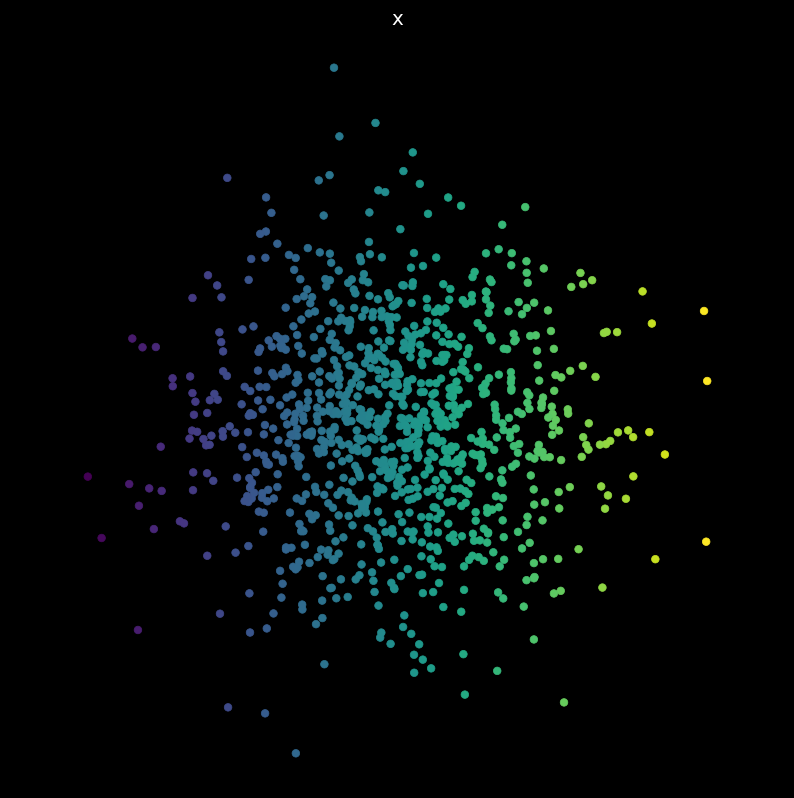

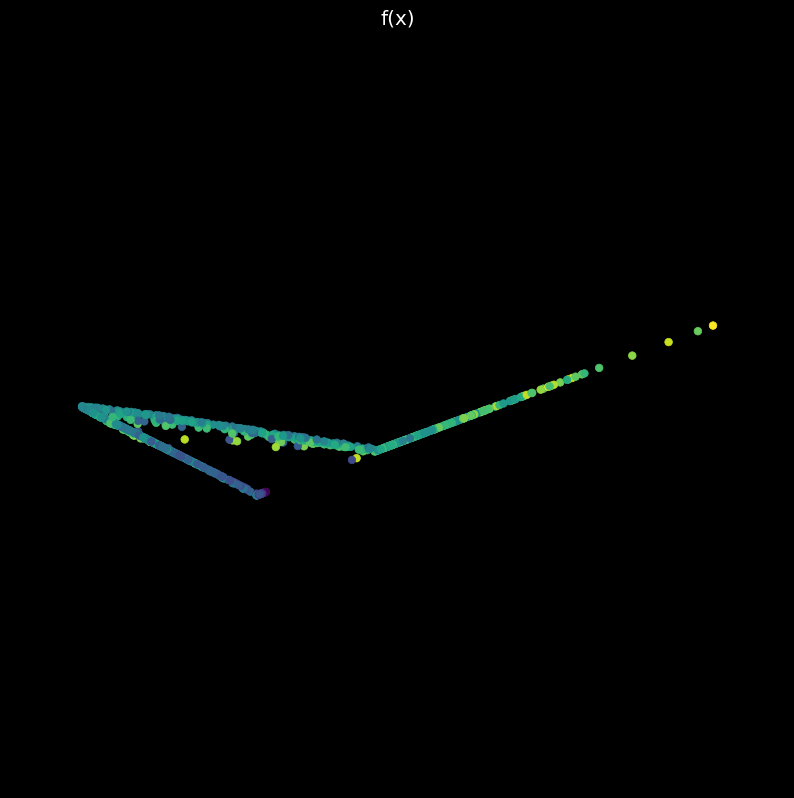

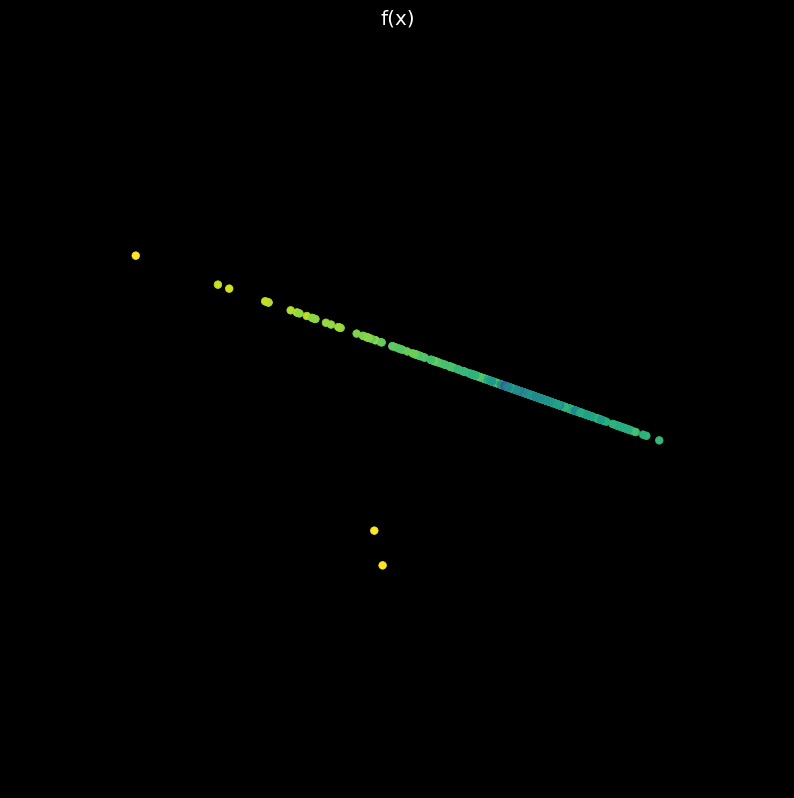

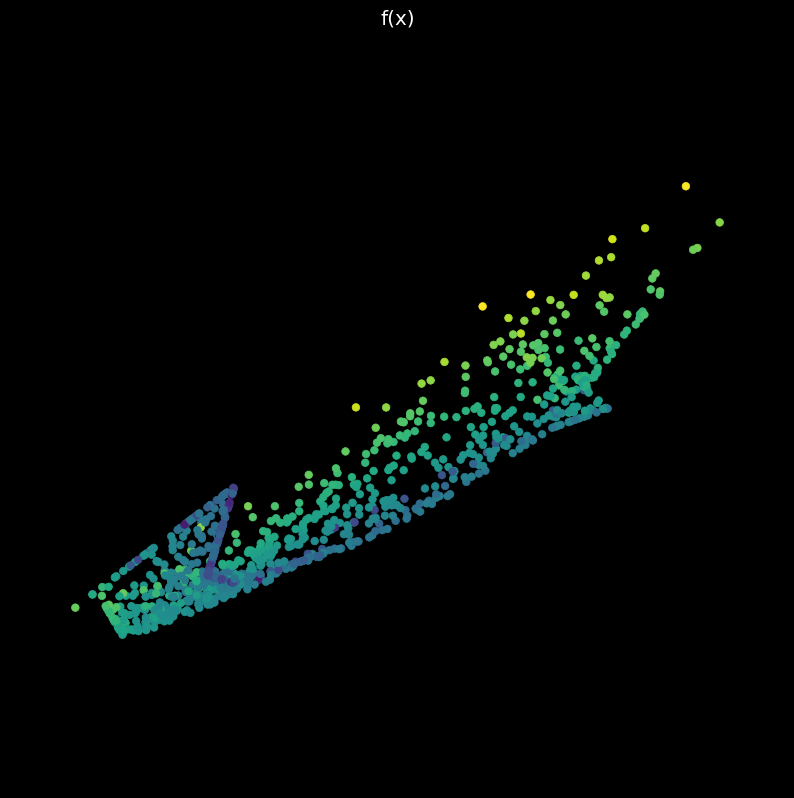

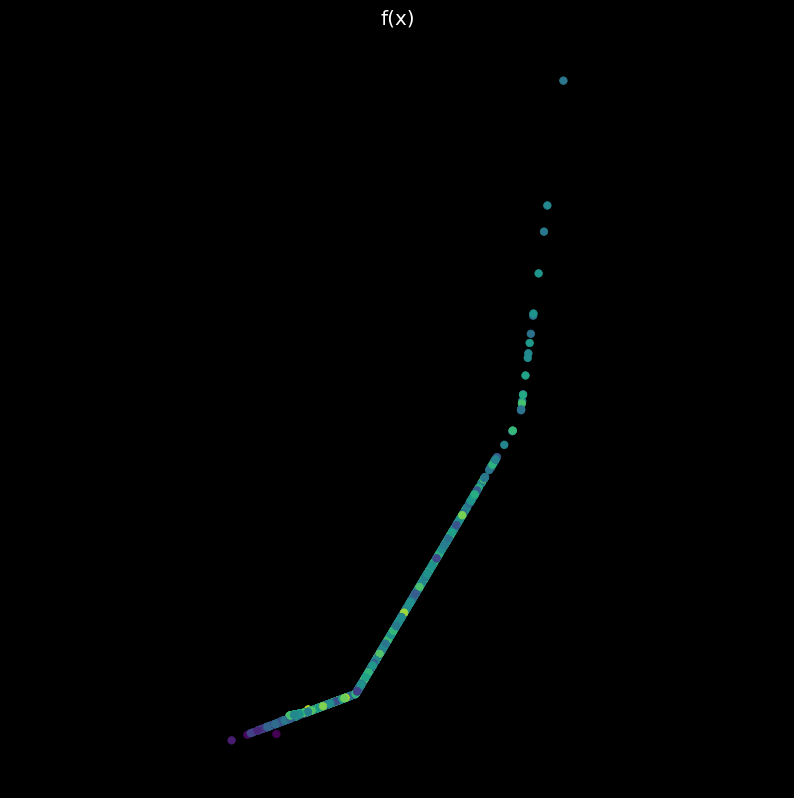

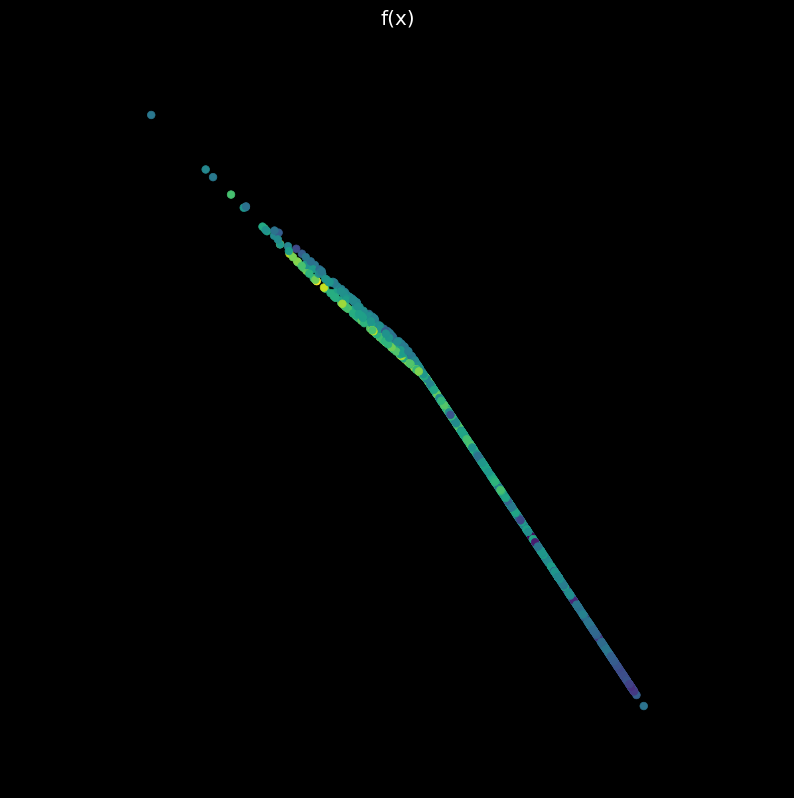

In [23]:
# deeper network + ReLU

show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden),
        NL,
        nn.Linear(n_hidden, n_hidden),
        NL,
        nn.Linear(n_hidden, n_hidden),
        NL,
        nn.Linear(n_hidden, n_hidden),
        NL,
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    
    with torch.no_grad():
        Y = model(X).detach()
    
    show_scatterplot(Y, colors, title='f(x)')